In [2]:
# %pip install OSMPythonTools

In [1]:
# %pip install shapely

In [16]:
%pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

import matplotlib.pyplot as plt

import requests
from shapely.geometry import shape
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.ops import polygonize, unary_union

import osmnx as ox

# from OSMPythonTools.api import Api
# from OSMPythonTools.overpass import Overpass
# from OSMPythonTools.nominatim import Nominatim

# import random
# from shapely.geometry import Point, LineString
# from shapely.ops import unary_union
# from shapely import offset_curve
# from dotenv import load_dotenv
# import requests

%matplotlib inline
pd.set_option('display.max_columns', None)  # Show all columns

In [2]:
uk_boundaries = gpd.read_file("natural_assets_data_raw/uk_boundaries.gpkg")

## Loading protected areas

In [87]:
protected_areas = ox.features_from_place("United Kingdom", tags = {"boundary": "protected_area"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
protected_areas = protected_areas.to_crs(epsg=27700)
protected_areas = protected_areas[protected_areas.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
protected_areas = protected_areas[~protected_areas.geometry.duplicated()].reset_index(drop=True)

In [88]:
protected_areas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Columns: 252 entries, geometry to short_name:en
dtypes: geometry(1), object(251)
memory usage: 2.2+ MB


In [97]:
protected_areas_over100 = protected_areas
protected_areas_over100 = protected_areas_over100[protected_areas_over100["access"] != "no"]
threshold = 1  # 100% NaNs
protected_areas_over100 = protected_areas_over100.loc[:, protected_areas_over100.isna().mean() < threshold]
protected_areas_over100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1133 entries, 0 to 1146
Columns: 244 entries, geometry to short_name:en
dtypes: geometry(1), object(243)
memory usage: 2.1+ MB


In [98]:
protected_areas_over100.head(1)

,geometry,boundary,protect_class,related_law,name,protection_title,wikidata,wikipedia,operator,place,alt_name,loc_name,protect_id,source,leisure,name:ga,ref,start_date,website,boundary_type,name:en,note,layer,area,description,designation,geological,operator:type,addr:street,archaeological_site,historic,opening_hours,operator:wikidata,natural,name:gd,not:operator:wikidata,landuse,seamark:restricted_area:restriction,seamark:type,short_name,size,wetland,intermittent,tidal,managed,operator:short,tourism,wheelchair,fee,ruins,contact:website,official_name,name:cy,heritage,heritage:operator,ref:whc,type,whc:criteria,whc:inscription_date,barrier,fence_type,url,leaf_cycle,leaf_type,foot,highway,surface,fixme,grassland,military,source_ref:ref,protected_area,addr:postcode,garden:type,access:conditional,water,wikimedia_commons,addr:city,heritage:website,historic:civilization,historic:era,historic:period,image,name:he,name:ru,phone,whc:name,whc:website,whc:wikipedia,location,megalith_type,name:non,name:uk,conservation,notified_feature,resource,owner,communication:amateur_radio:pota,man_made,governance_type,civilization,salt,Lowland,access,dog,ownership,protection_title2,disused:man_made,disused:product,old_name,plant,protection_object,valid_from,contact:email,name:la,check_date,historic:operator,fixme:designation,source:designation,note:name,note:landuse,embankment,fortification_type,name:fr,website:source,check_date:opening_hours,abandoned:landuse,source:name,conservation_organization,protection_aim,addr:suburb,Fixme,amenity,source:protection_title,denomination,name:zh,ele,contact:instagram,name:es,name:ja,name:pt,email,ref:GB:uprn,name:signed,name:is,plant_community,source:geometry,species,basin,flood_prone,FIXME,addr:housename,boundary_1,name:ar,name:be,name:br,name:da,name:de,name:hy,name:nl,name:nn,name:no,name:sv,access_land,meadow,source:description,landcover,top_soil,period,animal,animal_shelter,animal_shelter:release,animal_shelter:sanctuary,material,residential,alt_website,park,inscription,storage,url:bexhillnature,wikimedia_commons:pano,contact:facebook,ref:charity,wikimedia_commons:1,wikimedia_commons:2,disused:landuse,protected,listed_status,name:fa,name:lt,alt_name:en,geopark,alt_name:gd,ramsar,short_name:gd,full_name,name:mk,ref:gss,source:ref:gss,old_name:cy,old_name:en,name:ca,name:cs,name:fi,name:gl,name:it,name:pl,name:sk,name:sl,short_name:cy,wikipedia:cy,name:bg,name:el,name:eu,name:hr,name:hu,name:ka,name:ko,name:kw,name:sq,name:tr,name:vi,mapillary,ref:cadw,common_good_land,precision,name:ceb,heritage:ref,name:id,name:mt,name:pnb,name:sh,name:qu,protected_area:designation,license_notice,name:ang,name:wuu,acres,twitter,note_2,ref:FR:INPN,seamark:name,seamark:restricted_area:category,short_name:en
0,"POLYGON ((257432.785 147408.06, 257422.647 147...",protected_area,5,NaN,Exmoor National Park,national_park,Q593627,en:Exmoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.exmoor-nationalpark.gov.uk/,NaN,NaN,Contains public sector information licensed un...,NaN,NaN,NaN,national_park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exmoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,boundary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E26000002,ONS_OpenData,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
protected_areas_over100 = protected_areas_over100[protected_areas_over100.geometry.intersects(uk_boundaries.union_all())]

In [100]:
# fig, ax = plt.subplots(figsize=(20, 20))

# protected_areas_over100.plot(ax=ax, cmap='tab20', alpha=0.6)

# plt.title("Combined Features by Group")
# plt.legend()
# plt.axis('off')
# plt.show()

In [115]:
# protected_areas_over100.columns.tolist()

In [116]:
protected_areas_over100.drop(columns="Fixme", axis=1, inplace=True)

In [117]:
protected_areas_over100.to_file("natural_assets_data_raw/protected_areas.gpkg", driver="GPKG")

## Loading parks

In [86]:
parks = ox.features_from_place("United Kingdom", tags = {"leisure": "park", "access": "public"})
parks = parks.to_crs(epsg=27700)

parks = parks[parks.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
parks = parks[~parks.geometry.duplicated()].reset_index(drop=True)

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [118]:
parks_over100 = parks[parks.geometry.area > 1_000_000]
parks_over100 = parks_over100[parks_over100["access"] != "private"]
threshold = 1  # 90% NaNs
parks_over100 = parks_over100.loc[:, parks_over100.isna().mean() < threshold]
parks_over100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 218 entries, 9 to 33797
Columns: 125 entries, geometry to golf:par
dtypes: geometry(1), object(124)
memory usage: 214.6+ KB


In [119]:
parks_over100.head(1) #see useful comments

,geometry,leisure,name,access,barrier,addr:city,addr:postcode,alt_name,website,opening_hours,bicycle,foot,motorcar,motorcycle,email,opening_hours:covid19,phone,tourism,wikidata,wikipedia,addr:housename,contact:facebook,description,operator,operator:type,horse,addr:street,wheelchair,note,amenity,fee,name:en,place,dog,addr:country,operator:wikidata,source,designation,check_date,historic,surface,fixme,start_date,HE_ref,heritage,listed_status,wikimedia_commons,heritage:operator,is_in,url,natural,source:listed_status,type,landuse,goods,hgv,source:name,old_name,layer,not:operator:wikidata,addr:housenumber,leaf_cycle,area,contact:website,short_name,owner,loc_name,name:etymology:wikidata,operator:wikipedia,name:kw,name:cy,ref:GB:uprn,postal_code,boundary,addr:suburb,name:ru,name:zh,heritage:website,name:gd,common_good_land,alt_name:gd,official_name,fhrs:id,ownership,communication:amateur_radio:pota,protect_class,protection_title,alt_name:cy,alt_name:en,short_name:cy,short_name:en,park,name:uk,ref:GB:nhle,name:ur,psv,name:pronunciation,name:Natural_England,urban,listed_status:register,old_operator,alt_website,heritage:operator_1,heritage:operator:wikidata,name:ja,name:zh-Hans,name:he,name:hi,boundary_1,was:dog:conditional,loc_name:en,ref:whc,whc:criteria,whc:inscription_date,STAG_ADMIN:access,STAG_ADMIN:close_summer,STAG_ADMIN:close_winter,STAG_ADMIN:open_daily,STAG_BASE:landuse,STAG_LINETYPE:edge,STAG_USE:leisure,access:foot,name:zh-Hant,golf:course,golf:par
9,"POLYGON ((455659.735 205492.151, 455662.648 20...",park,Shotover Country Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q24677877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
parks_over100.to_file("natural_assets_data_raw/parks_over100ha.gpkg", layer='parks', driver="GPKG")

## Loading nature reserves

In [122]:
nature_reserves = ox.features_from_place("United Kingdom", tags = {"leisure": "nature_reserve"})
nature_reserves = nature_reserves.to_crs(epsg=27700)

nature_reserves = nature_reserves[nature_reserves.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
nature_reserves = nature_reserves[~nature_reserves.geometry.duplicated()].reset_index(drop=True)

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [123]:
nature_reserves_100 = nature_reserves[nature_reserves.geometry.area > 1_000_000]
nature_reserves_100 = nature_reserves_100[~nature_reserves_100["access"].isin(["private", "no"])]
threshold = 1  # 90% NaNs
nature_reserves_100 = nature_reserves_100.loc[:, nature_reserves_100.isna().mean() < threshold]
nature_reserves_100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 362 entries, 3 to 3481
Columns: 107 entries, geometry to seamark:restricted_area:category
dtypes: geometry(1), object(106)
memory usage: 305.4+ KB


In [124]:
nature_reserves_100["access"].value_counts()

access
yes           8
permissive    3
designated    3
Name: count, dtype: int64

nature_reserves_100 = nature_reserves_100[nature_reserves_100.geometry.intersects(uk_boundaries.union_all())]

In [125]:
nature_reserves_100.to_file("natural_assets_data_raw/nature_reserves_over100ha.gpkg", layer='nature_reserves', driver="GPKG")

In [94]:
# fig, ax = plt.subplots(figsize=(20, 20))

# nature_reserves_100.plot(ax=ax, cmap='tab20', alpha=0.6)

# plt.title("Combined Features by Group")
# plt.legend()
# plt.axis('off')
# plt.show()

## Loading gardens

In [127]:
gardens = ox.features_from_place("United Kingdom", tags = {"leisure": "garden"})
gardens = gardens.to_crs(epsg=27700)
gardens = gardens[gardens.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
gardens = gardens[~gardens.geometry.duplicated()].reset_index(drop=True)

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [128]:
gardens.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 284157 entries, 0 to 284156
Columns: 384 entries, geometry to power
dtypes: geometry(1), object(383)
memory usage: 832.5+ MB


In [129]:
gardens_100 = gardens[gardens.geometry.area > 100_000]
gardens_100 = gardens_100[~gardens_100["access"].isin(["private", "no"])]
threshold = 1  # 90% NaNs
gardens_100 = gardens_100.loc[:, gardens_100.isna().mean() < threshold]
# gardens_100.info()

In [131]:
# fig, ax = plt.subplots(figsize=(20, 20))

# gardens_100.plot(ax=ax, cmap='tab20', alpha=0.6)

# plt.title("Combined Features by Group")
# plt.legend()
# plt.axis('off')
# plt.show()

In [132]:
gardens_100.to_file("natural_assets_data_raw/gardens_over10ha.gpkg", layer='gardens', driver="GPKG")

## Loading beaches

see also: https://www.data.gov.uk/dataset/748b475b-e534-4298-90bf-cca7b244a374/beaches-ccgbc/datafile/ce627212-5fa4-41a7-abf5-747579ca0d15/preview
https://data-housinggovie.opendata.arcgis.com/datasets/housinggovie::blue-flag-beaches/explore?location=52.337208%2C-5.298342%2C6.58
https://www.keepbritaintidy.org/2024-blue-flag-and-seaside-award-winners

In [3]:
beaches = ox.features_from_place("United Kingdom", tags = {"natural": "beach"})
beaches = beaches.to_crs(epsg=27700)
beaches = beaches[beaches.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
beaches = beaches[~beaches.geometry.duplicated()].reset_index(drop=True)

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [133]:
beaches_100 = beaches[beaches.geometry.area > 100_000]
beaches_100 = beaches_100[~beaches_100["access"].isin(["private", "no"])]
threshold = 1  # 90% NaNs
beaches_100 = beaches_100.loc[:, beaches_100.isna().mean() < threshold]

In [134]:
beaches_100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 760 entries, 0 to 6256
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   geometry           760 non-null    geometry
 1   name               338 non-null    object  
 2   natural            760 non-null    object  
 3   surface            485 non-null    object  
 4   description        4 non-null      object  
 5   lifeguard          34 non-null     object  
 6   supervised         33 non-null     object  
 7   alt_name           13 non-null     object  
 8   alt_name:en        3 non-null      object  
 9   name:en            20 non-null     object  
 10  name:gd            15 non-null     object  
 11  wheelchair         1 non-null      object  
 12  website            2 non-null      object  
 13  fixme              4 non-null      object  
 14  source             172 non-null    object  
 15  name:cy            21 non-null     object  
 16  wiki

In [135]:
blue_flag = {
    "name": [
        "Porthcawl Marina", "Rest Bay", "Trecco Bay", "Cefn Sidan", "Aberystwyth South", "Borth",
        "Llangrannog", "Tresaith", "Prestatyn Central", "Broadhaven Central", "Coppet Hall", "Dale",
        "Newgale", "Poppit Sands", "Saundersfoot", "Tenby Castle Beach", "Tenby South", "Whitesands",
        "Tenby North", "Caswell Bay", "Langland Bay", "Port Eynon Bay", "Swansea Marina", "Penarth Marina",
        "Central Beach, Mablethorpe", "Central Beach, Skegness", "Central Beach, Sutton on Sea",
        "Three Shells Beach", "Westcliff Bay", "East Beach, Shoeburyness", "Shoebury Common", "Cromer",
        "Sheringham", "West Runton", "East Runton", "Frinton on Sea", "Brightlingsea", "Dovercourt Bay",
        "Felixstowe", "Southwold", "Whitley Bay South", "Tynemouth Longsands South", "King Edwards Bay",
        "Seaburn Beach", "Roker Beach", "Whitby", "Hornsea", "Withernsea", "Hayling Island Beachlands Central",
        "Saltdean Beach", "Hove Lawns", "Tankerton", "Sheerness", "St Mildred's Bay", "Minnis Bay",
        "Joss Bay", "West Wittering Beach", "Botany Bay", "Blackpool Sands", "Shore Road (Poole)",
        "Sandbanks Peninsula", "Avon Beach", "Highcliffe Beach", "Friars Cliff Beach", "Canford Cliffs",
        "Branksome Chine", "Alum Chine", "Manor Steps", "Durley Chine", "Fisherman's Walk", "Southbourne",
        "Carbis Bay", "Crooklets", "Gyllyngvase", "Porthmeor", "Polzeath", "Porthtowan", "Trevone Bay",
        "Widemouth Bay", "Summerleaze", "Beer", "Exmouth", "Seaton", "Sidmouth Town", "Swanage Central",
        "Dawlish Warren", "Breakwater Beach", "Broadsands", "Meadfoot Beach", "Preston Sands", "Oddicombe",
        "Torre Abbey Sands", "Westward Ho!", "Weymouth Central", "Croyde Bay",
        "Royal Albert Dock and Salthouse Dock Marina", "Rutland Water"
    ],
    "location": [
        "51.4797, -3.7047", "51.4879, -3.7086", "51.4761, -3.6936", "51.6860, -4.3511", "52.4083, -4.0855",
        "52.4872, -4.0506", "52.1460, -4.4705", "52.1325, -4.5043", "53.3314, -3.4131", "51.7742, -5.0997",
        "51.7131, -4.7032", "51.7075, -5.1695", "51.8478, -5.1273", "52.0825, -4.6997", "51.7100, -4.6997",
        "51.6725, -4.6997", "51.6667, -4.6997", "51.8936, -5.3033", "51.6750, -4.6997", "51.5714, -4.0333",
        "51.5714, -4.0167", "51.5461, -4.1764", "51.6150, -3.9392", "51.4400, -3.1694", "53.3400, 0.2600",
        "53.1430, 0.3360", "53.3200, 0.2700", "51.5380, 0.7130", "51.5370, 0.7050", "51.5500, 0.7900",
        "51.5450, 0.7550", "52.9310, 1.3010", "52.9440, 1.2100", "52.9350, 1.2410", "52.9370, 1.2590",
        "51.8310, 1.2450", "51.8120, 1.0220", "51.9330, 1.2800", "51.9630, 1.3510", "52.3270, 1.6800",
        "55.0400, -1.4400", "55.0200, -1.4300", "55.0200, -1.4200", "54.9300, -1.3700", "54.9300, -1.3700",
        "54.4870, -0.6140", "53.9100, -0.1700", "53.7300, -0.0300", "50.7900, -0.9800", "50.8000, -0.0500",
        "50.8200, -0.1700", "51.3600, 1.0500", "51.4400, 0.7600", "51.3800, 1.3300", "51.3700, 1.3100",
        "51.3700, 1.4300", "50.7800, -0.9000", "51.3800, 1.4300", "50.3000, -3.6200", "50.7100, -1.9500",
        "50.6900, -1.9400", "50.7300, -1.7400", "50.7400, -1.7100", "50.7300, -1.7500", "50.7100, -1.9200",
        "50.7100, -1.9300", "50.7100, -1.9200", "50.7100, -1.8600", "50.7100, -1.8800", "50.7100, -1.8500",
        "50.7200, -1.8200", "50.2000, -5.4700", "50.8300, -4.5500", "50.1470, -5.0700", "50.2120, -5.5290",
        "50.5740, -4.9160", "50.2790, -5.2420", "50.5510, -4.9720", "50.7900, -4.5500", "50.8300, -4.5500",
        "50.6980, -3.0940", "50.6180, -3.4040", "50.7040, -3.0700", "50.6780, -3.2380", "50.6080, -1.9570",
        "50.5980, -3.4360", "50.3920, -3.5100", "50.4080, -3.5490", "50.4560, -3.5140", "50.4410, -3.5590",
        "50.4750, -3.5250", "50.4610, -3.5370", "51.0420, -4.2370", "50.6060, -2.4560", "51.1270, -4.2390",
        "53.4000, -2.9900", "52.6500, -0.6300"
    ]
}

In [136]:
# Split lat-lon strings into float coordinates
latitudes = [float(loc.split(",")[0].strip()) for loc in blue_flag["location"]]
longitudes = [float(loc.split(",")[1].strip()) for loc in blue_flag["location"]]

# Create geometry (Points from lon, lat)
geometry = [Point(lon, lat) for lon, lat in zip(longitudes, latitudes)]
blue_flag = gpd.GeoDataFrame({"name": blue_flag["name"]}, geometry=geometry, crs="EPSG:4326")

In [137]:
blue_flag

,name,geometry
0,Porthcawl Marina,POINT (-3.7047 51.4797)
1,Rest Bay,POINT (-3.7086 51.4879)
2,Trecco Bay,POINT (-3.6936 51.4761)
3,Cefn Sidan,POINT (-4.3511 51.686)
4,Aberystwyth South,POINT (-4.0855 52.4083)
...,...,...
92,Westward Ho!,POINT (-4.237 51.042)
93,Weymouth Central,POINT (-2.456 50.606)
94,Croyde Bay,POINT (-4.239 51.127)
95,Royal Albert Dock and Salthouse Dock Marina,POINT (-2.99 53.4)


In [138]:
green_coast = {
    "name": [
        "Abereiddy", "Bracelet Bay", "Caerfai Bay", "Cilborth", "Druidston Haven", "Freshwater East",
        "Llanrhystud", "Manorbier", "Mwnt", "Penally", "Penbryn", "Silver Bay", "West Angle Bay",
        "Arklow South", "Ballyhiernan Bay", "Ballymoney", "Cahore South", "Donabate", "Dooey Beach",
        "Falcarragh Beach", "Garnish Beach", "Portmarnock", "Red Strand", "Renvyle", "Seapoint",
        "Silver Strand", "Thallabawn", "The Burrow", "Tyrella Beach (Clough)", "Abereiddy Bay",
        "Manorbier Bay"
    ],
    "location": [
        "51.935016, -5.2026574",  # Abereiddy
        "51.565189, -3.978006",   # Bracelet Bay
        "51.868997, -5.252989",   # Caerfai Bay
        "52.16191, -4.47051",     # Cilborth
        "51.7725, -5.0981",       # Druidston Haven
        "51.649382, -4.865176",   # Freshwater East
        "52.3059, -4.1457",       # Llanrhystud
        "51.6399, -4.7922",       # Manorbier
        "52.13584, -4.64092",     # Mwnt
        "51.6553, -4.7226",       # Penally
        "52.13988, -4.49436",     # Penbryn
        "53.3039, -4.5833",       # Silver Bay (approximate)
        "51.6882, -5.1107",       # West Angle Bay
        "52.788502, -6.142623",   # Arklow South
        "55.2000, -7.6170",       # Ballyhiernan Bay (approximate)
        "52.6556, -6.2361",       # Ballymoney (approximate)
        "52.5417, -6.2333",       # Cahore South (approximate)
        "53.4833, -6.1500",       # Donabate (approximate)
        "55.0167, -8.3167",       # Dooey Beach (approximate)
        "55.1833, -8.1000",       # Falcarragh Beach (approximate)
        "51.5333, -9.4667",       # Garnish Beach (approximate)
        "53.4333, -6.1375",       # Portmarnock (approximate)
        "51.5667, -8.9333",       # Red Strand (approximate)
        "53.5667, -10.0167",      # Renvyle (approximate)
        "53.2933, -6.1333",       # Seapoint (approximate)
        "53.2667, -9.0833",       # Silver Strand (approximate)
        "53.6333, -9.8167",       # Thallabawn (approximate)
        "53.3000, -6.2000",       # The Burrow (approximate)
        "54.3167, -5.7167",       # Tyrella Beach (Clough) (approximate)
        "51.935016, -5.2026574",  # Abereiddy Bay (same as Abereiddy)
        "51.6399, -4.7922"        # Manorbier Bay (same as Manorbier)
    ]
}

In [139]:
# Split lat-lon strings into float coordinates
latitudes = [float(loc.split(",")[0].strip()) for loc in green_coast["location"]]
longitudes = [float(loc.split(",")[1].strip()) for loc in green_coast["location"]]

# Create geometry (Points from lon, lat)
geometry = [Point(lon, lat) for lon, lat in zip(longitudes, latitudes)]
green_coast = gpd.GeoDataFrame({"name": green_coast["name"]}, geometry=geometry, crs="EPSG:4326")

In [140]:
green_coast

,name,geometry
0,Abereiddy,POINT (-5.20266 51.93502)
1,Bracelet Bay,POINT (-3.97801 51.56519)
2,Caerfai Bay,POINT (-5.25299 51.869)
3,Cilborth,POINT (-4.47051 52.16191)
4,Druidston Haven,POINT (-5.0981 51.7725)
5,Freshwater East,POINT (-4.86518 51.64938)
6,Llanrhystud,POINT (-4.1457 52.3059)
7,Manorbier,POINT (-4.7922 51.6399)
8,Mwnt,POINT (-4.64092 52.13584)
9,Penally,POINT (-4.7226 51.6553)


In [141]:
seaside_award = {
    "name": [
        "Aberavon", "Aberystwyth North", "Clarach", "Cold Knap", "Jackson's Bay", "New Quay Harbour",
        "Rhyl Central", "Traeth y Dolau", "Whitmore Bay", "Llantwit Major", "Penarth", "Aberporth",
        "New Quay Traeth Gwyn", "Aberdeen Ballroom Beach", "Balmedie Beach", "Collieston", "Cruden Bay",
        "Fraserburgh Tigerhill", "Fraserburgh Waters of Philorth", "Inverboyndie Beach", "Peterhead Lido",
        "Stonehaven Beach", "Montrose Seafront", "Carnoustie", "Arbroath", "Lunan Bay", "Monifieth",
        "East Haven", "Broughty Ferry", "Belhaven Bay", "Dunbar East", "Longniddry Bents, Gosford",
        "Yellowcraig", "North Berwick Milsey Bay", "North Berwick West Beach", "Longniddry Bents",
        "Gullane Bents", "Aberdour Silver Sands", "Anstruther Billowness", "Burntisland Beach",
        "Crail Roome Bay", "Elie Harbour", "Elie Ruby Bay", "Kingsbarns Beach", "Kirkcaldy Seafield",
        "Leven East", "St Andrews East Sands", "St Andrews West Sands", "Aberdour Black Sands",
        "Kirkcaldy Pathhead Sands", "Kinghorn and Pettycur Bay", "Brora Beach", "Dornoch Beach",
        "Sango Sands", "Nairn Central", "Loch Morlich", "Irvine", "Coldingham", "West Sandwick",
        "Sands of Breckon", "Ayr South", "Troon", "Maidens", "Prestwick", "Girvan", "Barassie Shore"
    ],
    "location": [
        "51.5931, -3.7897", "52.4194, -4.0829", "52.4443, -4.0774", "51.3906, -3.2892", "51.3931, -3.2728",
        "52.2150, -4.3560", "53.3200, -3.4910", "52.2130, -4.3540", "51.3894, -3.2694", "51.4040, -3.4930",
        "51.4340, -3.1730", "52.1390, -4.5430", "52.2140, -4.3510", "57.1497, -2.0930", "57.2510, -2.0160",
        "57.3500, -2.0830", "57.4180, -1.8490", "57.6920, -2.0030", "57.6900, -1.9800", "57.6670, -2.5090",
        "57.5050, -1.7890", "56.9630, -2.2080", "56.7080, -2.4680", "56.5010, -2.7070", "56.5590, -2.5820",
        "56.6330, -2.5560", "56.4820, -2.7780", "56.5100, -2.7240", "56.4670, -2.8800", "56.0010, -2.5270",
        "56.0030, -2.5100", "56.0050, -2.8750", "56.0580, -2.8280", "56.0580, -2.7140", "56.0580, -2.7220",
        "56.0050, -2.8750", "56.0370, -2.8270", "56.0580, -3.2820", "56.2240, -2.7020", "56.0580, -3.2360",
        "56.2570, -2.6260", "56.1900, -2.8300", "56.1880, -2.8310", "56.2730, -2.6300", "56.1070, -3.1660",
        "56.2000, -3.0000", "56.3380, -2.7830", "56.3430, -2.8140", "56.0580, -3.2830", "56.1200, -3.1500",
        "56.0700, -3.1700", "58.0090, -3.8530", "57.8800, -4.0300", "58.5050, -4.4170", "57.5880, -3.8750",
        "57.1670, -3.6740", "55.6119, -4.6693", "55.8840, -2.1390", "60.5130, -1.4560", "60.5550, -1.0330",
        "55.4500, -4.6230", "55.5430, -4.6600", "55.3650, -4.8370", "55.5000, -4.6160", "55.2400, -4.8530",
        "55.5410, -4.6470"
    ]
}

In [142]:
# Split lat-lon strings into float coordinates
latitudes = [float(loc.split(",")[0].strip()) for loc in seaside_award["location"]]
longitudes = [float(loc.split(",")[1].strip()) for loc in seaside_award["location"]]

# Create geometry (Points from lon, lat)
geometry = [Point(lon, lat) for lon, lat in zip(longitudes, latitudes)]
seaside_award = gpd.GeoDataFrame({"name": seaside_award["name"]}, geometry=geometry, crs="EPSG:4326")

In [143]:
seaside_award

,name,geometry
0,Aberavon,POINT (-3.7897 51.5931)
1,Aberystwyth North,POINT (-4.0829 52.4194)
2,Clarach,POINT (-4.0774 52.4443)
3,Cold Knap,POINT (-3.2892 51.3906)
4,Jackson's Bay,POINT (-3.2728 51.3931)
...,...,...
61,Troon,POINT (-4.66 55.543)
62,Maidens,POINT (-4.837 55.365)
63,Prestwick,POINT (-4.616 55.5)
64,Girvan,POINT (-4.853 55.24)


In [144]:
# 1. Merge the three GeoDataFrames
combined_coast_awards = pd.concat([blue_flag, seaside_award, green_coast], ignore_index=True)

# 2. Drop identical points (based on geometry - lat-lon)
combined_coast_awards = combined_coast_awards.drop_duplicates(subset='geometry')

# 3. Create the new columns for each award type
combined_coast_awards['blue_flag'] = combined_coast_awards['name'].isin(blue_flag['name']).astype("int")
combined_coast_awards['seaside_award'] = combined_coast_awards['name'].isin(seaside_award['name']).astype("int")
combined_coast_awards['green_coast'] = combined_coast_awards['name'].isin(green_coast['name']).astype("int")

combined_coast_awards = combined_coast_awards.to_crs(epsg=27700)

In [145]:
combined_coast_awards

,name,geometry,blue_flag,seaside_award,green_coast
0,Porthcawl Marina,POINT (281717.843 177016.376),1,0,0
1,Rest Bay,POINT (281468.324 177934.56),1,0,0
2,Trecco Bay,POINT (282479.338 176598.156),1,0,0
3,Cefn Sidan,POINT (237573.051 201199.154),1,0,0
4,Aberystwyth South,POINT (258237.044 280966.584),1,0,0
...,...,...,...,...,...
187,Seapoint,POINT (124653.884 385341.86),0,0,1
188,Silver Strand,POINT (-72038.707 397878.3),0,0,1
189,Thallabawn,POINT (-116344.573 443660.561),0,0,1
190,The Burrow,POINT (120255.086 386346.184),0,0,1


In [146]:
combined_coast_awards.to_file("natural_assets_data_raw/coast_awards_point.gpkg", layer='coast_awards', driver="GPKG")

In [147]:
# 1. Create a 400m buffer for each point in the combined_coast_awards
combined_coast_awards['buffer'] = combined_coast_awards.geometry.buffer(400)

# 2. Initialize a new column in beaches_100 to store the sum of award columns
beaches_100['coast_award_sum'] = 0  # Default to 0

# 3. Loop through each beach polygon in beaches_100 and check for intersections with the buffered points
for idx, beach in beaches_100.iterrows():
    # Create a mask to identify points within the 400m buffer of the current beach
    mask = combined_coast_awards['buffer'].intersects(beach['geometry'])
    
    # Get the points that intersect with the current beach polygon
    intersecting_points = combined_coast_awards[mask]
    
    # Sum the award columns for the intersecting points
    # Assuming the award columns are 'blue_flag', 'seaside_award', 'green_coast'
    beach_award_sum = intersecting_points[['blue_flag', 'seaside_award', 'green_coast']].sum().sum()
    
    # Assign the award sum to the beach's award_sum column
    beaches_100.at[idx, 'coast_award_sum'] = beach_award_sum

In [148]:
beaches_100.head()

,geometry,name,natural,surface,description,lifeguard,supervised,alt_name,alt_name:en,name:en,name:gd,wheelchair,website,fixme,source,name:cy,wikidata,access,fee,image,nudism,wikipedia,url,tourism,note,operator,tidal,dog,highway,area,alt_name:gd,designation,source:name,wetland,layer,name:kw,water,sport,ref,dog:conditional,opening_hours,operator:wikidata,addr:city,foot,fishing,alt_name:cy,vehicle,type,motor_vehicle,landuse,start_date,leisure,horse,ref:GB:uprn,addr:country,owner,waterway,coast_award_sum
0,"POLYGON ((320716.603 677076.823, 320669.155 67...",Drum Sands,beach,sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tidal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,"POLYGON ((119462.764 602141.967, 119545.29 602...",White Park Bay,beach,NaN,NaN,NaN,NaN,White Park Strand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q16903231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"POLYGON ((332780.459 163169.415, 332778.988 16...",Sand Bay,beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q7415759,NaN,NaN,NaN,NaN,en:Sand Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"POLYGON ((637525.866 243682.808, 637532.23 243...",Orford Beach,beach,pebblestone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,"POLYGON ((624768.266 225716.013, 624776.064 22...",NaN,beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OS_OpenData_VectorDistrict,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [149]:
beaches_100.to_file("natural_assets_data_raw/beaches.gpkg", layer='beaches', driver="GPKG")

In [150]:
beaches_100["coast_award_sum"].value_counts()

coast_award_sum
0    713
1     40
2      5
3      2
Name: count, dtype: int64

In [151]:
# natural_values = [
#     "wood"
#     # , "tree", "tree_row", "scrub", "heath", "grassland", "fell", "bare_rock",
#     # "scree", "shingle", "sand", "mud", "beach", "dune", "cliff", "rock", "stone",
#     # "water", "wetland", "glacier", "reef", "cave_entrance"
# ]

# features_2 = {}

# for val in natural_values:
#     tag_2 = {"natural": val}
#     gdf = fetch_osm_features("United Kingdom", tag_2, element_types=("way", "relation"))
#     if gdf is not None and not gdf.empty:
#         features_2[val] = gdf
#         print(f"{val}: {len(gdf)} features")
#     else:
#         print(f"{val}: No features")

## Loading forests

In [61]:
forest = ox.features_from_place("United Kingdom", tags = {"boundary": "forest"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [153]:
forest = forest.to_crs(epsg=27700)
forest = forest[forest.geometry.area > 100_000]
forest = forest[forest.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
forest = forest[~forest.geometry.duplicated()].reset_index(drop=True)

In [154]:
forest.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   geometry           10 non-null     geometry
 1   boundary           10 non-null     object  
 2   name               8 non-null      object  
 3   leisure            1 non-null      object  
 4   landuse            3 non-null      object  
 5   operator           6 non-null      object  
 6   source             2 non-null      object  
 7   type               5 non-null      object  
 8   operator:type      2 non-null      object  
 9   operator:wikidata  1 non-null      object  
 10  start_date         1 non-null      object  
 11  website            1 non-null      object  
 12  wikidata           1 non-null      object  
 13  wikipedia          1 non-null      object  
 14  note               1 non-null      object  
dtypes: geometry(1), object(14)
memory usage: 1.3+ KB


In [155]:
# fig, ax = plt.subplots(figsize=(20, 20))

# gardens_100.plot(ax=ax, cmap='tab20', alpha=0.6)

# plt.title("Combined Features by Group")
# plt.legend()
# plt.axis('off')
# plt.show()

In [156]:
forest.head(1)

,geometry,boundary,name,leisure,landuse,operator,source,type,operator:type,operator:wikidata,start_date,website,wikidata,wikipedia,note
0,"MULTIPOLYGON (((407795.029 261496.899, 407764....",forest,Heart of England Forest,NaN,NaN,NaN,bing;survey,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
forest.to_file("natural_assets_data_raw/forest.gpkg", layer='forest', driver="GPKG")

In [70]:
forest_lnd_use = ox.features_from_place("United Kingdom", tags = {"landuse": "forest"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [158]:
forest_lnd_use = forest_lnd_use.to_crs(epsg=27700)
forest_lnd_use = forest_lnd_use[forest_lnd_use.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
forest_lnd_use = forest_lnd_use[~forest_lnd_use.geometry.duplicated()].reset_index(drop=True)

In [159]:
forest_lnd_use_over100 = forest_lnd_use[forest_lnd_use.geometry.area > 100_000]
forest_lnd_use_over100 = forest_lnd_use_over100[forest_lnd_use_over100["access"] != "private"]
threshold = 1  # 90% NaNs
forest_lnd_use_over100 = forest_lnd_use_over100.loc[:, forest_lnd_use_over100.isna().mean() < threshold]
forest_lnd_use_over100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 16673 entries, 0 to 16715
Columns: 115 entries, geometry to source:listed_status
dtypes: geometry(1), object(114)
memory usage: 14.8+ MB


In [161]:
# forest_lnd_use.plot()

In [160]:
# forest_lnd_use.head()

In [165]:
lower_cols = [col.lower() for col in forest_lnd_use.columns]
from collections import Counter
dupes_ci = [item for item, count in Counter(lower_cols).items() if count > 1]
print("Case-insensitive duplicate columns:", dupes_ci)

Case-insensitive duplicate columns: []


In [167]:
# forest_lnd_use.drop(columns="FIXME", axis=1, inplace=True)

In [168]:
forest_lnd_use.to_file("natural_assets_data_raw/forest_lnd_use.gpkg", layer='forest_lnd_use', driver="GPKG")

## Loading fishing spots

In [77]:
fishing = ox.features_from_place("United Kingdom", tags = {"leisure": "fishing"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [169]:
fishing.to_file("natural_assets_data_raw/fishing.gpkg", layer='fishing', driver="GPKG")

## Loading caves

In [78]:
cave = ox.features_from_place("United Kingdom", tags = {"natural": "cave_entrance"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [171]:
cave.head(1)

,,geometry,name,natural,fixme,source,cave:length,created_by,direction,fee,name:en,name:gd,ref,cave:depth,wikidata,wikipedia,tourism,access,alt_name:gd,geological,description,alt_name,cave:difficulty,cave:size,cave:through_trip,ele,note,alt_name:en,source:name,cave_entrance,wikimedia_commons,wheelchair,website,name:sco,name:cy,source_name,addr:postcode,opening_hours,historic,source_ref,man_made,mineral,height,amenity,shelter_type,sport,cave:access,cave:equipment,cave,subject:wikidata,subject:wikipedia,disused,length,image,name:pronunciation,is_in,is_in:country_code,is_in:historic_county,is_in:valley,is_in:county,is_in:municipality,source:description,attraction,loc_name,old_name,designation,name:zh,survey,addr:city,addr:street,place,operator,notes,sinkhole,addr:suburb,charge,payment:cash,payment:credit_cards,addr:country,check_date:opening_hours,fee:conditional,toilets:wheelchair,name:etymology:wikidata,name:ru,barrier,camera:type,surveillance,surveillance:type,archaeological_site,heritage,heritage:operator,heritage:website,ref:he,HE_ref,description:listed_status,entrance,listed_status,start_date,alt_name1,alt_name2,phone,check_date,name:ga,landcover,landuse,architect,source:area,source:listed_status
element,id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
node,12788558,POINT (-2.37718 54.13508),Beck Head Stream Cave,cave_entrance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,permit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.geograph.org.uk/photo/283159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
cave.to_file("natural_assets_data_raw/cave.gpkg", layer='cave', driver="GPKG")

## Loading wetlands

In [173]:
wetlands = ox.features_from_place("United Kingdom", tags = {"natural": "wetlands"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

## Loading

In [185]:
scrub = ox.features_from_place("United Kingdom", tags = {"natural": "scrub"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [183]:
hills = ox.features_from_place("United Kingdom", tags = {"natural": "hill"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


<Axes: >

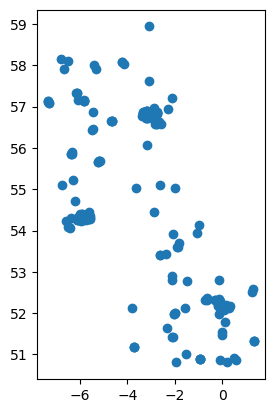

In [184]:
hills.plot()

## Valleys

In [174]:
valleys = ox.features_from_place("United Kingdom", tags = {"natural": "valley"})

/opt/conda/lib/python3.11/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 330 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [175]:
valleys = valleys.to_crs(epsg=27700)
valleys = valleys[valleys.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
# valleys = valleys[~valleys.geometry.duplicated()].reset_index(drop=True)

In [182]:
valleys_100ha = valleys[valleys.geometry.area > 100_000]
# valleys_100ha = valleys_100ha[valleys_100ha["access"] != "private"]
# threshold = 1  # 90% NaNs
# valleys_100ha = valleys_100ha.loc[:, valleys_100ha.isna().mean() < threshold]
# valleys_100ha.info()

In [187]:
#returns empty plot

In [ ]:
battlefields = ox.features_from_place("United Kingdom", tags = {"historic": "battlefield"})

In [ ]:
historic_district = ox.features_from_place("United Kingdom", tags = {"historic": "district"})

In [ ]:
tags = {
  "type": "railwayStation"
}

stations = fetch_osm_features("England", tags, element_types=("nodes"))

print(stations.head())
print(f"Total features: {len(stations)}")

# Save or plot
# gdf.to_file("filtered_features.geojson", driver="GeoJSON")
stations.plot()

In [ ]:
https://hub.arcgis.com/datasets/RSPB::ibas-uk/about

## Loading stations

In [ ]:
stations = ox.features_from_place("United Kingdom", tags = {"type": "railwayStation"})
stations = stations.to_crs(epsg=27700)
stations = stations[beaches.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
stations = stations[~stations.geometry.duplicated()].reset_index(drop=True)